In [1]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')


df = pd.read_csv('../data/gedichtenGGD_STCN_Steur_stripped.csv', sep=';', index_col=0)
print(df.shape)

(3696, 31)


In [2]:
df.groupby('Database')['Database'].count()

Database
KB       3382
STCN      266
Steur      48
Name: Database, dtype: int64

In [ ]:
#df['Alleauteurs'] = df[df.columns[8:30]].apply(
    #lambda x: ', '.join(x.dropna().astype(str)),
    #axis=1)

In [2]:
authors = df['Alleauteurs'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

In [ ]:
authors.to_csv('authors.csv', sep=';')

In [4]:
authors.value_counts()

1      2608
2       438
3       169
4        84
5        54
6        51
7        30
8        18
10       14
9        13
12       11
13        7
14        7
11        6
16        6
15        5
21        5
17        4
27        3
33        3
19        3
18        2
26        2
28        2
20        1
22        1
65        1
73        1
38        1
42        1
102       1
108       1
114       1
61        1
79        1
25        1
43        1
47        1
49        1
167       1
dtype: int64

In [5]:
authors.sum(axis = 0, skipna = True)

7681

In [6]:
authors.count()

3561

In [7]:
printers = df.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

In [ ]:
#printers.to_csv('printers.csv', sep=';')

In [8]:
printers.value_counts()

1      330
2      121
3       49
4       33
5       22
6       19
7       14
8       10
9        6
11       3
15       3
10       3
12       3
19       2
17       2
13       2
122      1
94       1
16       1
18       1
21       1
23       1
49       1
59       1
74       1
92       1
14       1
Name: Drukker, dtype: int64

In [9]:
couples = df.groupby('Bruidspaar')['Bruidspaar'].count().sort_values(ascending=False)

In [10]:
couples.sum(axis = 0, skipna = True)

3696

In [11]:
couples.count()

3302

In [ ]:
#df1.to_csv('Allebruidsparen.csv', sep='\t')

In [2]:
df.head()

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur14,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs
0,,,,,,,,,,,,,,,,,,,,,
1111,KB,1600.0,Guilielmus Martigny,Anna Brederode,Guilielmus Martigny & Anna Brederode,Aelbrecht Hendricksz,s-Gravenhage,NaN,Hugo de Groot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hugo de Groot
1112,KB,1600.0,Guilielmus Martigny,Anna Brederode,Guilielmus Martigny & Anna Brederode,Aelbrecht Hendricksz,s-Gravenhage,Amsterdam,Johannes Meursius,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Johannes Meursius
676,KB,1601.0,Nicolaas van Hyc,Margareta van den Berch,Nicolaas van Hyc & Margareta van den Berch,Thomas Basson,Leiden,Haarlem,Joachim Cranendonck,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joachim Cranendonck
1039,KB,1601.0,Henricus van Cranenburg,Johanna van Nieupoort,Henricus van Cranenburg & Johanna van Nieupoort,Christoffel Guyot,Leiden,NaN,Henricus Jonckheyn,Arnoldus And. Pagius,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Henricus Jonckheyn, Arnoldus And. Pagius"
1040,KB,1602.0,Hugo Laurentius Swaenwijck,Janneken Cornelisd Vroesen,Hugo Laurentius Swaenwijck & Janneken Cornelis...,Christoffel Guyot,Leiden,Amsterdam,Matthaeus Adriaensz Burgius,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matthaeus Adriaensz Burgius


In [79]:
df.loc[df['n-authors'] == 22]

,Database,year,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs,n-authors
0,,,,,,,,,,,,,,,,,,,,,
3085,KB,1740.0,Josua van der Poorten,Hillegonda Josina van Eik,Josua van der Poorten & Hillegonda Josina van Eik,NaN,NaN,Sloterdijk,Justus van Maurik,Wilhem Suderman,...,Gerrit Blaaupot,Abraham Suderman,Dirk Willink,Matthijs Straalman,E.C.,Frans van Steenwyk,Abraham de (1707-1748) Haen,F.B.S.,"Justus van Maurik, Wilhem Suderman, Pieter van...",22


In [13]:
df_year = df[(df['Jaar'] >= 1600)
& (df['Jaar'] <= 1760)]

In [31]:
years = df.groupby('year')['year'].count()

In [50]:
years.iloc[128:159].mean()

39.61290322580645

In [3]:
df = df.rename(columns = {'Jaar':'year'})

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/alielassche/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alielassche/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


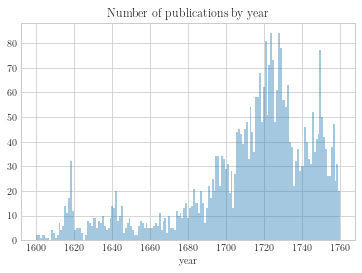

In [30]:
sns.distplot(df['year'], kde=False, bins=161)
plt.title('Number of publications by year')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('histyear.png', dpi=300)

In [10]:
df.shape

(3696, 31)

In [11]:
df_year.shape

(3679, 31)

In [4]:
df.isna().sum()

Database              0
year                 17
Bruidegom             0
Bruid                 0
Bruidspaar            0
Drukker            1565
Plaats_druk        1572
Plaats_huwelijk     918
Auteur1             662
Auteur2            2203
Auteur3            2660
Auteur4            2994
Auteur5            3220
Auteur6            3364
Auteur7            3474
Auteur8            3549
Auteur9            3594
Auteur10           3639
Auteur11           3662
Auteur12           3675
Auteur13           3686
Auteur14           3689
Auteur15           3691
Auteur16           3695
Auteur17           3695
Auteur18           3695
Auteur19           3695
Auteur20           3695
Auteur21           3695
Auteur22           3695
Alleauteurs         662
dtype: int64

In [5]:
df['n-authors'] = df.loc[:, 'Auteur1':'Auteur22'].count(axis=1)

In [52]:
df_authors_year = df[df['n-authors'] != 0]

In [53]:
n_authors_year = df_authors_year.groupby('year')['n-authors'].mean()

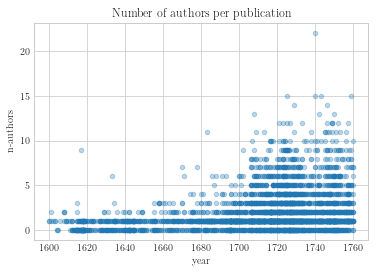

In [25]:
df.plot.scatter(x="year", y="n-authors", alpha=0.3)
plt.title('Number of authors per publication')
plt.savefig('n_authors.png', dpi=300)

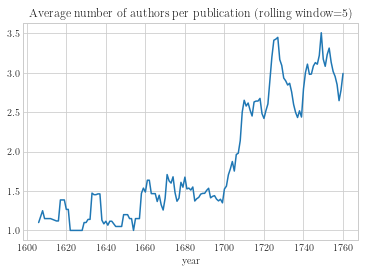

In [55]:
n_authors_year.rolling(window=5).mean().plot()
plt.title('Average number of authors per publication (rolling window=5)')
plt.savefig('n_authors_rolling_without_0.png', dpi=300)

In [6]:
df[['firstname_bride', 'lastname_bride']] = df.Bruid.str.rsplit(' ', 1, expand=True)
df[['firstname_groom', 'lastname_groom']] = df.Bruidegom.str.rsplit(' ', 1, expand=True)
df[['firstname_printer', 'lastname_printer']] = df.Drukker.str.rsplit(' ', 1, expand=True)

In [7]:
df['bride_authors'] = df.fillna('').apply(lambda row: row['lastname_bride'] in row['Alleauteurs'], axis=1)
df['groom_authors'] = df.fillna('').apply(lambda row: row['lastname_groom'] in row['Alleauteurs'], axis=1)
df['bride_printer'] = df.fillna('').apply(lambda row: row['lastname_bride'] in row['Drukker'], axis=1)
df['groom_printer'] = df.fillna('').apply(lambda row: row['lastname_groom'] in row['Drukker'], axis=1)
df['Printer_authors'] = df.fillna('').apply(lambda row: row['Drukker'] in row['Alleauteurs'], axis=1)

In [8]:
df['lastnameprinter_authors'] = df.fillna('').apply(lambda row: row['lastname_printer'] in row['Alleauteurs'], axis=1)

In [9]:
print(df.groupby('lastnameprinter_authors')['lastnameprinter_authors'].count())

lastnameprinter_authors
False    1486
True     2210
Name: lastnameprinter_authors, dtype: int64


In [10]:
print(df.groupby('bride_authors')['bride_authors'].count())
print(df.groupby('groom_authors')['groom_authors'].count())
print(df.groupby('bride_printer')['bride_printer'].count())
print(df.groupby('groom_printer')['groom_printer'].count())
print(df.groupby('Printer_authors')['Printer_authors'].count())

bride_authors
False    3273
True      423
Name: bride_authors, dtype: int64
groom_authors
False    3145
True      551
Name: groom_authors, dtype: int64
bride_printer
False    3680
True       16
Name: bride_printer, dtype: int64
groom_printer
False    3672
True       24
Name: groom_printer, dtype: int64
Printer_authors
False    1780
True     1916
Name: Printer_authors, dtype: int64


In [33]:
df6 = df[df['lastnameprinter_authors']==True]
df6.groupby('lastname_printer')['lastname_printer'].count().sort_values(ascending=False)

lastname_printer
Oosterwyk        95
Gaete            53
Braam            17
Visscher         13
Willis           12
Broen             9
Halma             8
Bosch             7
Dathenus          6
Woude             6
Duim              5
Hulkenroy         5
Rotterdam         4
Barents           4
Doesburg          4
Lelivelt          4
Sligtenhorst      4
Berge             4
Blussé            4
Ruarus            4
Lobedanius        3
Ribbius           3
Boitet            3
Mourik            3
Smets             3
Sweerts           2
Gerrevink         2
Dronsberg         2
Hoogstraten       2
Beek              2
                 ..
Byl               1
Klinkhamer        1
Esveldt           1
Groot             1
Wijers            1
Wees              1
Wagens            1
Vieroot           1
Verheyde          1
Stokmans          1
Stam              1
Spanseerder       1
Smetius           1
Septeren          1
Schagen           1
Royen             1
Putte             1
Paets             1
Out

In [21]:
df1 = df[df['groom_authors']==True]
s1 = df1.groupby('lastname_groom')['lastname_groom'].count().sort_values(ascending=False)

In [11]:
df2 = df[df['bride_authors']==True]

In [22]:
s2 = df2.groupby('lastname_bride')['lastname_bride'].count().sort_values(ascending=False)

AttributeError: 'Series' object has no attribute 'concat'

In [28]:
s2.isin(s1)

lastname_bride
Bruyn         True
Veen          True
Pielat        True
Sart          True
Schutte       True
Hollebeek     True
Brandt        True
Hoffham       True
Ryser         True
Huydecoper    True
Makreel       True
Burlett       True
Strengh       True
Suderman      True
Breur         True
Heems         True
Have          True
Bosch         True
Terwen        True
Lomannus      True
Sluys         True
Meulen        True
Buys          True
Thin          True
Michell       True
Scholten      True
Croese        True
Muilman       True
Muller        True
Nolk          True
              ... 
Preyger       True
Orsoy         True
Raap          True
Ravesteyn     True
Regt          True
Reitz         True
Rensselaar    True
Reus          True
Ribbius       True
Os            True
Ordykus       True
Mol           True
Nolthenius    True
Moonen        True
Mooy          True
Mortier       True
Moubach       True
Mulier        True
Nessing       True
Nispen        True
Noppen        Tr

lastname_groom
Issendorp     False
Bosch          True
Bruyn          True
Kinderen       True
Burman         True
Verryn         True
Raket          True
Fortgens       True
Koek           True
Haan           True
Brakel         True
Bruynvis       True
Son            True
Cramer         True
Visscher       True
Groot          True
Poot           True
Muller         True
Kops           True
Hoffham        True
Heinius        True
Halmael        True
Smit           True
Schelle        True
Schim          True
Capelle        True
Schorer        True
Schouten       True
Schryver       True
Buys           True
              ...  
Ridder         True
Rigail         True
Robidé         True
Robyn          True
Rodenburg      True
Roger          True
Pluym          True
Plancius       True
Petersen       True
Pesch          True
Muyser         True
Mylius         True
Nahuys         True
Neck           True
Neelen         True
Nieukerk       True
Nieuwhoff      True
Nievelt        True
Nolth

In [13]:
df3 = df[df['Printer_authors']==True]
df3.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

Drukker
Joannes Oosterwyk                   94
Hendrik van de Gaete                53
Lescailje                           34
Joannes van Braam                   17
Geldorp                             12
Arnold Willis                       12
Goeree                               7
Joris van der Woude                  6
Petrus Dathenus                      5
Hendrik Sligtenhorst                 4
François Halma                       4
David Ruarus                         4
Johannes Rotterdam                   4
Abraham Blussé                       4
Hendrik Bosch                        4
Wetstein                             4
Arnoldus Lobedanius                  3
Willem Barents                       3
Cornelis Lelivelt                    3
Johan van Doesburg                   3
Reinier Boitet                       3
Arnoldus Olofsen                     2
Hendrik Callenbach                   2
Hendrik Smets                        2
Gijsbert Rijkman                     2
Hendrik Stockinck

In [14]:
df4 = df[df['groom_printer']==True]
df4.groupby('lastname_groom')['lastname_groom'].count().sort_values(ascending=False)

lastname_groom
Groot         2
Elzevier      1
Aertsz        1
Bos           1
Broen         1
Bruyn         1
Casteleyn     1
Castricum     1
Commelin      1
Damme         1
Duim          1
Willis        1
Wetstein      1
Hackius       1
Heuvel        1
Hulkenroy     1
Klinkhamer    1
Leeuwen       1
Poolsum       1
Ribbius       1
Scheltus      1
Schouten      1
Aardenberg    1
Name: lastname_groom, dtype: int64

In [18]:
df5 = df[df['bride_printer']==True]
df5.groupby('lastname_bride')['lastname_bride'].count().sort_values(ascending=False)

lastname_bride
Scheltus      2
Oosterwyk     2
Groot         2
Wetstein      1
Visch         1
Rieuwertsz    1
Ribbius       1
Ravesteyn     1
Marcus        1
Geldorp       1
Damme         1
Broers        1
Bergh         1
Name: lastname_bride, dtype: int64

In [68]:
df5 = df.groupby(['Jaar', 'Bruidspaar'])['Bruidspaar'].count().sort_values(ascending=False)

In [69]:
df5.head()

Jaar    Bruidspaar                                                     
1756.0  Lieve Geelvinck (1730-1757) & Catharina Elisabeth Hasselaer        5
1753.0  Joan Frederik d' Orville & Maria Philippina Schryver               5
1728.0  Jan Six (1668-1750) & Anna Elisabeth van den Bempden               5
1750.0  Christian Scholten van Aschat & Johanna Catharina van Wesele       5
1718.0  Herman Vingerhoedt (1697-1762) & Johanna Ignatia van der Hoeven    4
Name: Bruidspaar, dtype: int64

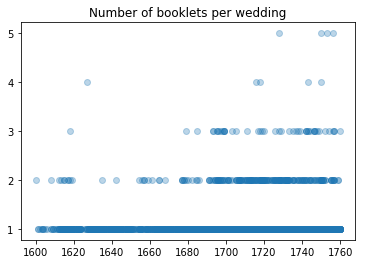

In [80]:
import numpy as np
plt.scatter(x=df5.index.get_level_values(0), y=df5.values, alpha=0.3)
plt.yticks(np.arange(1, 6, step=1))
plt.title('Number of booklets per wedding')
plt.savefig('n_booklets_wedding.png', dpi=300)